# Week 3
## Limits of Diversification

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [32]:
import edhec_risk_kit as erk
ind_ret = erk.get_ind_return()
ind_size = erk.get_ind_size()
ind_nfirms = erk.get_ind_nfirms()

In [33]:
ind_cap= ind_size * ind_nfirms
total_mktcap = ind_cap.sum(axis = 1)

In [34]:
ind_capweight = ind_cap.divide(total_mktcap, axis = 0)

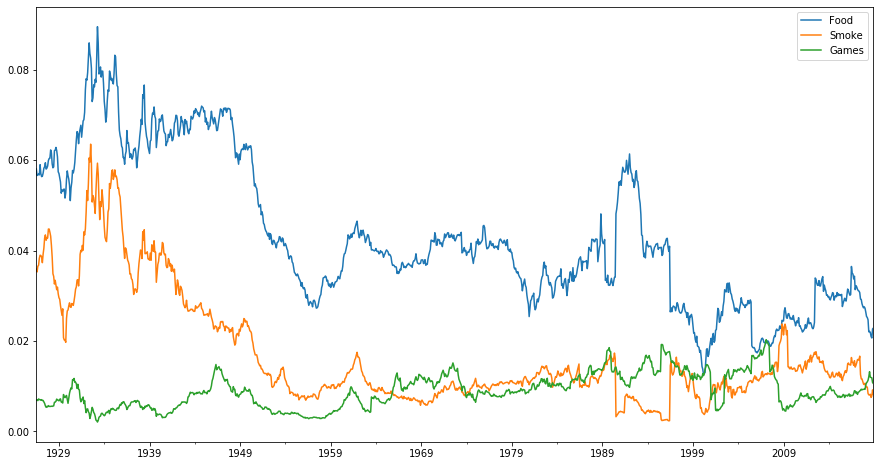

In [35]:
#Market Capitalisation of these three industry over years
ind_capweight[["Food", "Smoke", "Games"]].plot(figsize = (15,8))

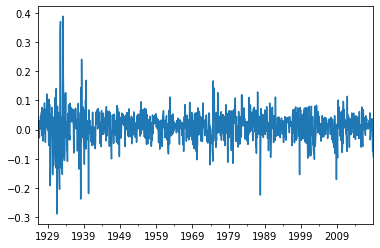

In [36]:
total_market_return = (ind_capweight * ind_ret).sum(axis=1) #we sum it up because we want to see one return in one year
total_market_return.plot()

In [37]:
total_market_index = 1000*(1+ total_market_return).cumprod()

## Rolling Return Calculation

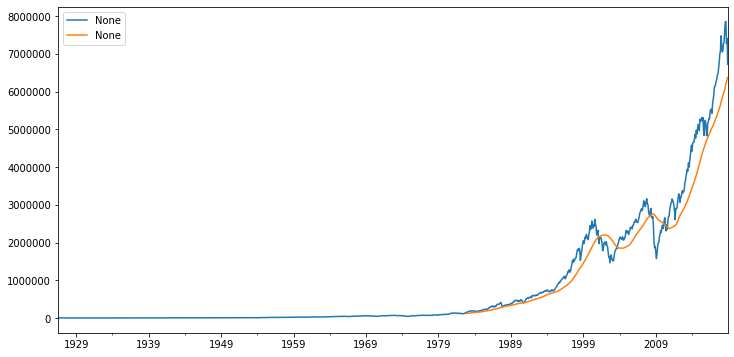

In [38]:
total_market_index.plot(legend = True)
total_market_index["1980":].rolling(window = 36).mean().plot(legend = True, figsize = (12,6))

## Trailing Return: 
Bir nöqteden basliyaraq növbeti 36 ayin hesablanmasi. Ona göre ilk 36 ay hec bir return olmur
Rolling funksiyasi sadece ve sadece mentiqi qebul edir. Ona göre de rolling func sonra hansisa bir funksiya 
gelmelidir. BU Mean ola biler Sum ola biler 

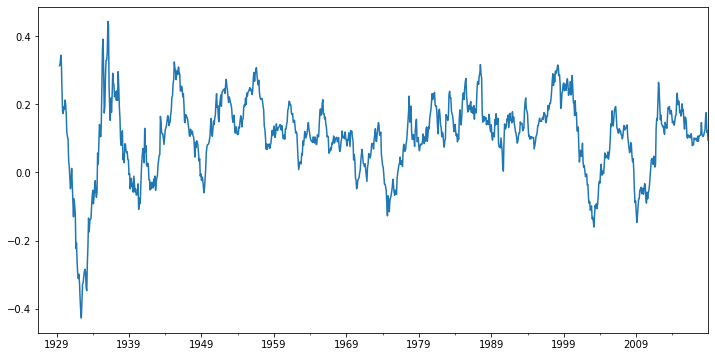

In [40]:
trailing__36Mon_Ret = total_market_return.rolling(window = 36).aggregate(erk.annualized_ret, period =12)

trailing__36Mon_Ret.plot(figsize = (12,6), label ="Trailing 36 Month Return")

## Rolling Correlations - along with Multi Indexes and '.groupby'

In [41]:
timeseries_corr = ind_ret.rolling(36).corr()
timeseries_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

### What we see above it produces two index  and they do not have any name but we need only one and have to give names to use group.by function

In [42]:
timeseries_corr.index.names

FrozenList([None, None])

In [43]:
timeseries_corr.index.names = ["date", "industry"]

In [44]:
Trailing_36_Corr = timeseries_corr.groupby(by = "date").apply(lambda Corrmatrix:Corrmatrix.values.mean() )

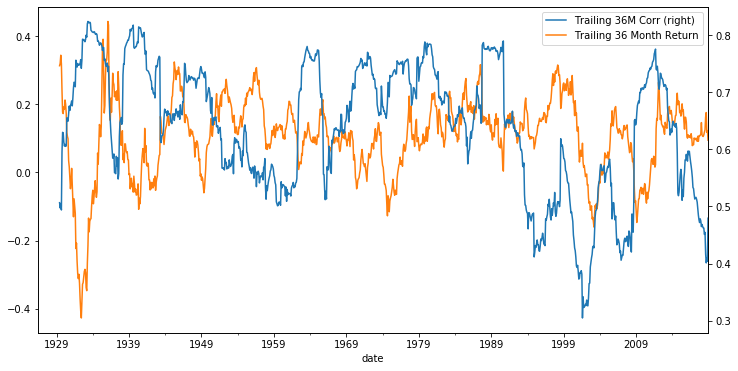

In [45]:
Trailing_36_Corr.plot(label ="Trailing 36M Corr", legend =True, secondary_y = True)
trailing__36Mon_Ret.plot(legend = True, label ="Trailing 36 Month Return", figsize = (12,6))


## We see Trailing 36 Month Correlation with Trailing 36 Month returns correlate during stress times more

In [46]:
trailing__36Mon_Ret["2008":"2009"].corr(Trailing_36_Corr["2008":"2009"]) # It shows correlation between two lines of orange and blue of above

-0.8820050190695333

# CPPI and Drawdown Constrainst Part I

In [47]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import edhec_risk_kit as erk
ind_return = erk.get_ind_return()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
#Risky Assets
risky_r = ind_return["2000":][["Steel","Fin","Beer"]]

In [49]:
#Safe Assets
safe_r = pd.DataFrame().reindex_like(risky_r)
safe_r[:] = 0.03/12
start = 1000
floor = 0.8

# Steps To DO
1. Cushion -> Asset Value minus Floor Value
2. Compute an Allokcation to Safe and Risky Assets --> m + risk budget
3. Recompute the Asset Value based on the returns

In [5]:
def compound1(r):
    return (1+r).prod()-1
def compound2(r):
    return np.expm1(np.log1p(r).sum())

In [6]:
compound1(risky_r)

Steel   -0.051696
Fin      1.773937
Beer     3.361349
dtype: float64

In [7]:
compound2(risky_r)

Steel   -0.051696
Fin      1.773937
Beer     3.361349
dtype: float64

In [8]:
%timeit compound1(risky_r)

1.32 ms ± 75.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%timeit compound2(risky_r)

371 µs ± 5.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#  CPPI Algorithm
    

In [10]:
dates = risky_r.index
n_steps = len(dates)
account_value = start
floor_value = start*floor
m = 3
account_history = pd.DataFrame().reindex_like(risky_r)
cushion_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)


for step in range(n_steps):
    cushion = (account_value - floor_value)/account_value
    risky_w = m * cushion
    risky_w = np.minimum(risky_w, 1)
    risky_w = np.maximum(risky_w, 0)
    safe_w = 1 - risky_w
    risky_alloc = account_value*risky_w
    safe_alloc = account_value * safe_w
    
    ## Update the account value for this time step
    account_value =(risky_alloc * (1+risky_r.iloc[step])) +safe_alloc*(1+safe_r.iloc[step])
    #save the values so I can look at he history and plot it
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value

In [11]:
account_history.head()

,Steel,Fin,Beer
2000-01,984.380000,974.480000,987.320000
2000-02,1023.292876,931.167544,922.971256
2000-03,1047.555176,998.187296,924.835988
2000-04,1042.079009,973.927479,939.993701
2000-05,1007.137753,1001.460033,991.145489


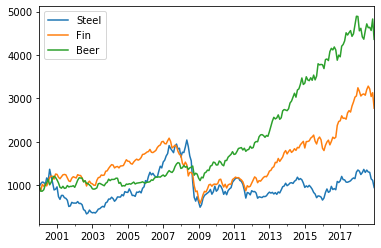

In [12]:
risky_wealth = start*(1+risky_r).cumprod()
risky_wealth.plot()

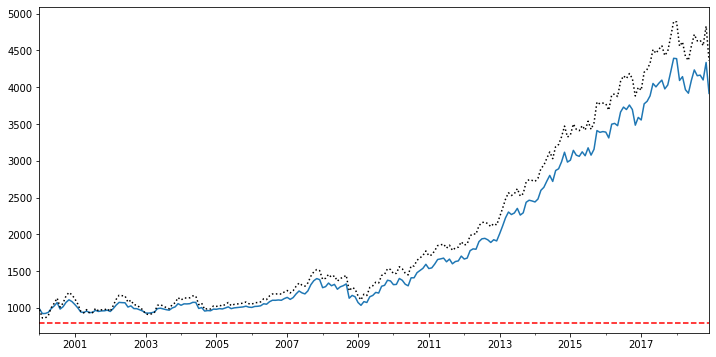

In [13]:
ax = account_history["Beer"].plot(figsize = (12,6))
risky_wealth["Beer"].plot(ax=ax, style ="k:")
ax.axhline(y=floor_value, color = "r", linestyle ="--")

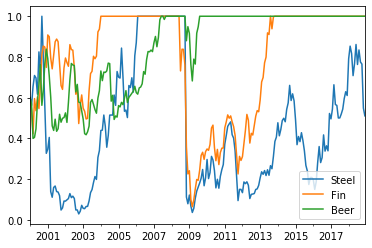

In [14]:
risky_w_history.plot()

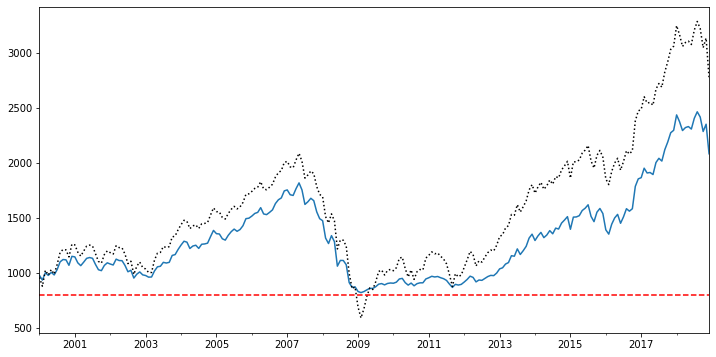

In [15]:
ax = account_history["Fin"].plot(figsize = (12,6))
risky_wealth["Fin"].plot(ax=ax, style ="k:")
ax.axhline(y=floor_value, color = "r", linestyle ="--")

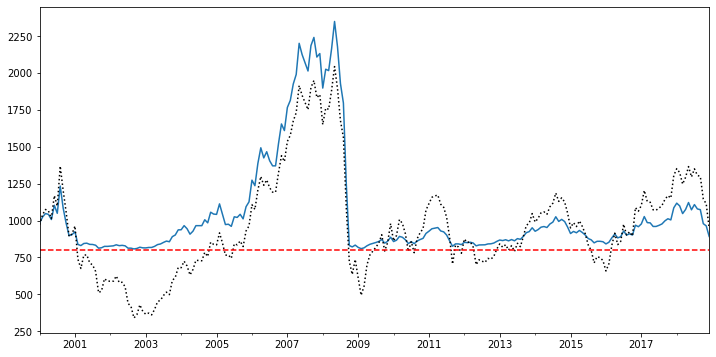

In [16]:
ax = account_history["Steel"].plot(figsize = (12,6))
risky_wealth["Steel"].plot(ax=ax, style ="k:")
ax.axhline(y=floor_value, color = "r", linestyle ="--")

In [67]:
btr = erk.run_cppi(risky_r)
erk.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.005167,0.174180,-1.995143,17.110190,0.091995,0.130153,-0.196750,-0.655198
Fin,0.040894,0.131678,-0.946504,6.051414,0.065535,0.091621,0.080352,-0.549673
Beer,0.075544,0.115462,-0.669250,4.760879,0.052923,0.074908,0.383772,-0.259582


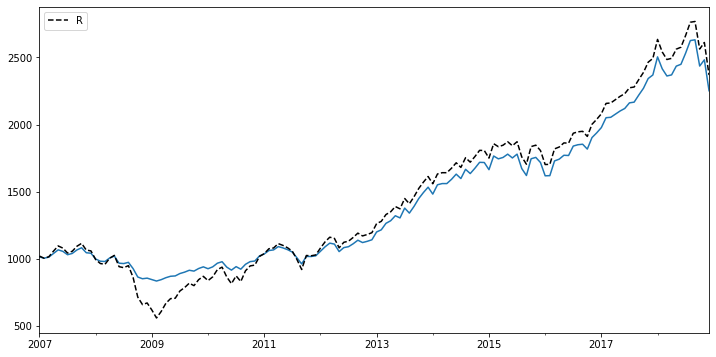

In [53]:
btr = erk.run_cppi(total_market_return["2007":])
ax = btr["Wealth"].plot(figsize = (12,6), legend = False)
btr["Risky Wealth"].plot(ax = ax, style ="k--")


In [56]:
erk.summary_stats(btr["Risky Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
R,0.073411,0.150463,-0.734939,4.523488,0.071592,0.096315,0.280618,-0.499943


In [57]:
erk.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
R,0.069416,0.100381,-0.588292,3.740932,0.045678,0.062953,0.382052,-0.229683


# Drawdown Constrain

In [68]:
btr = erk.run_cppi(ind_return["2007":][["Steel", "Fin", "Beer"]], drawdown = 0.25, riskfree = 0.03)

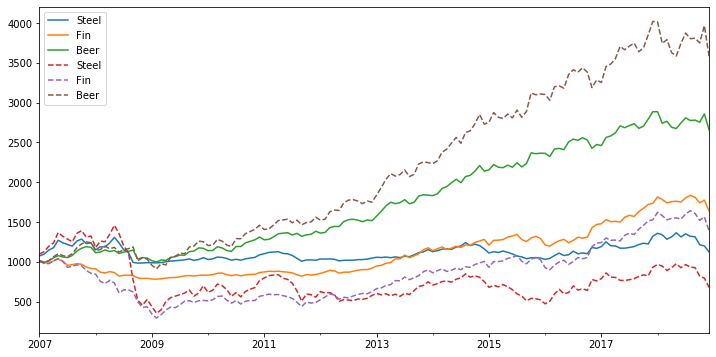

In [69]:
ax = btr["Wealth"].plot(figsize = (12,6))
btr["Risky Wealth"].plot(ax=ax,style ="--")

# Simulating asset returns with random walks

In [92]:
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2
import ipywidgets as widget


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
erk.gbm(n_years=1, n_scenarios=100, mu=0.07)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,105.831087,95.805848,97.744936,103.276037,101.982338,102.154959,104.735104,100.613262,103.243886,93.851803,...,96.112076,98.664050,98.191230,102.578945,105.505375,101.270137,103.538610,99.667795,102.903016,100.922525
2,105.704502,93.364950,97.939978,104.942354,103.747947,105.400261,111.040943,98.198044,105.700986,86.130012,...,93.909738,99.938493,101.199591,90.057772,99.835786,109.679719,102.044568,104.261058,104.697446,104.764149
3,110.994601,93.025111,104.454763,101.793331,98.326234,107.931050,114.914071,96.819980,110.408545,88.281325,...,94.014708,98.860246,98.224725,89.372503,108.514048,108.318239,100.452671,109.865792,111.404077,105.654489
4,114.874562,89.427342,105.524011,102.982094,99.504613,110.630406,114.080942,95.521446,119.376300,93.298767,...,92.932759,93.564962,97.909225,83.289028,108.031475,109.164378,103.153846,113.136193,109.885065,102.973274
5,122.556231,87.139693,109.652166,112.795994,103.825004,115.239375,119.459541,95.953421,121.809651,94.551702,...,95.735758,92.784435,96.024821,82.280142,109.389048,97.828973,99.733805,115.240523,113.847086,108.171971
6,122.158499,93.629631,105.851214,114.772305,113.478832,118.800732,123.745957,93.170660,122.705542,95.006662,...,100.300121,89.314735,92.006083,82.057029,112.099259,100.987783,95.234025,112.049030,104.077214,112.353359
7,122.367512,92.299522,105.821272,105.166307,107.109117,117.481793,128.916827,96.822981,125.603040,97.378246,...,101.388235,88.983182,90.703583,84.342177,109.190905,96.172809,99.783134,111.688685,101.292639,105.285051
8,128.921856,98.162668,105.143499,106.133714,108.018277,120.813564,132.869251,92.860682,123.883688,98.369377,...,94.582372,85.090030,90.132940,81.804035,113.587662,97.497534,100.391520,116.674236,105.772767,110.254413
9,139.295319,87.558337,102.501807,107.594019,112.172122,122.563077,140.946669,98.126213,130.714343,105.434483,...,94.228510,80.939738,92.827954,78.843093,109.729242,93.493563,97.991302,121.302585,102.606801,116.180771


# Interactive Plotting and Monte Carlo Simulations of CPPI

In [105]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
def show_gbm(n_sce, mean, std, S0):
    """
    Show interactive plot of Brownian Motion
    """
    prices = erk.gbm(n_scenarios = n_sce, mu = mean, sigma = std, s_0 =S0)
    ax = prices.plot(legend=False, color = "indianred", alpha = 0.5, linewidth = 2, figsize = (12,6))
    ax.axhline(y= S0, ls = ":", color= "black")
    ax.plot(0,S0, marker='o',color='darkred', alpha=0.2)

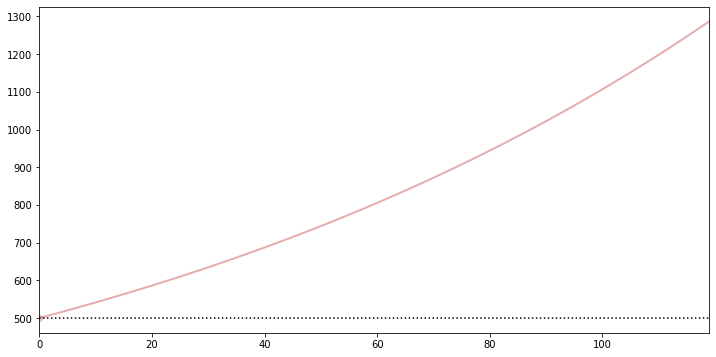

In [110]:
gbm_control = widgets.interactive(show_gbm,n_sce=widgets.IntSlider(min=1, max=1000, step=1, value=1),
                                  mean=(-0.2,0.4,0.01),
                                  std=(0,1,0.05),
                                  S0=(100,1000,100)
                                 )
display(gbm_control)

In [112]:
pip install ipywidgets


Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1076)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [113]:
jupyter nbextension enable --py widgetsnbextension

SyntaxError: invalid syntax (<ipython-input-113-98201c4d83e5>, line 1)